# Caroline Surratt - Exploratory Data Analysis

### Canceled & No-Call-No-Show Shifts

This code and markdown that follows serves as an exploratory analysis to inform my design of the Short Notice Shifts feature for the Clipboard Health application.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

shifts_link = 'https://drive.google.com/uc?export=download&id=194DmMS0NPAyQBwAYEtMg7VDW8M-Re72H'
shifts = pd.read_csv(shifts_link)
shifts.columns

Index(['ID', 'Agent ID', 'Facility ID', 'Start', 'Agent Req', 'End', 'Deleted',
       'Shift Type', 'Created At', 'Verified', 'Charge', 'Time'],
      dtype='object')

In [2]:
shifts.rename(columns={'Agent ID': 'Agent_ID', 
                       'Facility ID': 'Facility_ID', 
                       'Agent Req': 'Agent_Req',
                       'Shift Type': 'Shift_Type',
                       'Created At': 'Created_At'}, inplace=True)
shifts

,ID,Agent_ID,Facility_ID,Start,Agent_Req,End,Deleted,Shift_Type,Created_At,Verified,Charge,Time
0,61732a2ad690c401690cf273,614627661afb050166fecd99,5f9c169622c5c50016d5ba32,2021-10-27 23:00:00,LVN,2021-10-28 3:00:00,NaN,pm,2021-10-22 21:16:26,True,43.00,4.17
1,61732a4fd690c401690cf307,60d5f4c8a9b88a0166aedaca,5f9c169622c5c50016d5ba32,2021-10-28 11:00:00,CNA,2021-10-28 19:00:00,NaN,am,2021-10-22 21:17:04,True,25.00,5.00
2,61732ab7d6e633016acd05e2,5d7fb6319b671100167be1f1,5f9c169622c5c50016d5ba32,2021-10-30 19:00:00,LVN,2021-10-31 3:00:00,NaN,pm,2021-10-22 21:18:48,True,64.75,8.00
3,61732c33d6e633016acd11fc,613503b78b28c60166060efe,5e6bd68c8d921f0016325d09,2021-10-25 18:30:00,CNA,2021-10-26 3:00:00,NaN,pm,2021-10-22 21:25:08,True,28.00,8.44
4,61759081801438016ae23301,6099c93f2a957601669549c3,61704cc1f19e4d0169ec4ac5,2021-11-03 2:00:00,CNA,2021-11-03 10:00:00,NaN,noc,2021-10-24 16:57:37,True,30.00,7.50
...,...,...,...,...,...,...,...,...,...,...,...,...
41035,6187ed9a4c1d53018557ba47,NaN,5fa0a33daaa281001684ade2,2021-11-24 20:00:00,LVN,2021-11-25 4:00:00,NaN,pm,2021-11-07 15:15:38,False,43.00,7.50
41036,61aa7611262d6201801ca50a,NaN,616854371fbb170169a0e7d3,2022-01-19 12:00:00,LVN,2022-01-20,True,am,2021-12-03 19:54:58,False,50.00,11.50
41037,61940576c1d0040180fe7ccf,NaN,5f9c119522c5c50016d5b89e,2021-11-24 12:00:00,CNA,2021-11-24 20:00:00,True,am,2021-11-16 19:24:39,False,25.00,7.50
41038,61d9ab534499db018bce5e00,NaN,61422c7f81f2950166d5f881,2022-01-09 11:00:00,LVN,2022-01-09 19:00:00,True,am,2022-01-08 15:18:43,False,60.00,7.50


In [3]:
bookings_link = 'https://drive.google.com/uc?export=download&id=1L6wwqtNbgvbHj1wEh_kiuyJxzzVc92g3'
bookings = pd.read_csv(bookings_link)
bookings.columns

Index(['ID', 'Created At', 'Shift ID', 'Action', 'Worker ID', 'Facility ID',
       'Lead Time'],
      dtype='object')

In [4]:
bookings.rename(columns={'Created At': 'Created_At',
                        'Shift ID': 'Shift_ID',
                        'Worker ID': 'Worker_ID',
                        'Facility ID': 'Facility_ID',
                        'Lead Time': 'Lead_Time'}, inplace=True)
bookings

,ID,Created_At,Shift_ID,Action,Worker_ID,Facility_ID,Lead_Time
0,615f58b997538d018b1163e0,2021-10-07 20:29:46,615e1de54502b9016c9a5af1,SHIFT_CLAIM,5c993c695d096c00167e6845,615b46a1c7135401876cdd06,144.504167
1,61608ce36790e5016acaf149,2021-10-08 18:24:35,616060338917ec016965f9a0,SHIFT_CLAIM,61587d5a2ced390187554556,5fbd2a01582f640016a4cb09,200.590278
2,61677eea7dce1d016a9b7f95,2021-10-14 0:50:51,61645d1dfdd396016a697466,SHIFT_CLAIM,60898a05cd5d9c016675a996,5c3cc2e3a2ae5c0016bef82c,73.652778
3,6166159a8186c5016a54dd6d,2021-10-12 23:09:15,616093710daae0016926f60d,SHIFT_CLAIM,60ba35153c4b4f016610c5cd,60c1495470d2440166e23cb0,118.846111
4,616391cec03fa3016a12a316,2021-10-11 1:22:23,614b6df64cd99701667bb099,SHIFT_CLAIM,60de429441198701669b529a,614900f003c26b0166e08737,178.627222
...,...,...,...,...,...,...,...
127000,6180a18c229c4301d4647471,2021-11-02 2:25:16,617992c86b463c016a79469b,SHIFT_CLAIM,5ef0c2da98b2fa00174e02da,601847cd498fe1001680dfd3,48.578889
127001,617c214f03f747018a6356c4,2021-10-29 16:29:04,615f3c0aa3a18801692cca27,SHIFT_CLAIM,61104a8978eab30166c3ab2c,5f283c4a2e013300168b8d8f,654.015833
127002,617d4cc3d718bb018b0fad79,2021-10-30 13:46:43,617826810d5811016b1a851c,SHIFT_CLAIM,6173f258901ceb0169c4f2fb,60ae73d5346dbf01666e5648,13.221389
127003,617b23ddeb9239018c26a464,2021-10-28 22:27:42,617b1d0147b5810169aaa2d9,SHIFT_CLAIM,601062a2a069d100162dd3fa,61002534f443dd01665ec165,400.038611


This feature is designed to address **canceled shifts** and **no-call-no-show-shifts**. It is not designed to address shifts that are never booked.

Therefore, this analysis will only focus on shifts that have been booked. An inner merge will be performed to further analyze shifts that have at least one corresponding booking.

This analysis will also exclude shifts that were canceled by the facility.

In [5]:
from pandasql import sqldf 
pysqldf = lambda q: sqldf(q, globals())

q = """SELECT s.ID, s.Facility_ID, s.Verified, s.Charge, s.Time, b.Worker_ID, b.Lead_Time
FROM shifts AS s
JOIN bookings AS b
ON s.ID = b.Shift_ID
WHERE s.Deleted IS NULL"""

all_booked_shifts = pysqldf(q)
all_booked_shifts[:10]

,ID,Facility_ID,Verified,Charge,Time,Worker_ID,Lead_Time
0,61732a2ad690c401690cf273,5f9c169622c5c50016d5ba32,1,43.00,4.17,614627661afb050166fecd99,15.408333
1,61732a4fd690c401690cf307,5f9c169622c5c50016d5ba32,1,25.00,5.00,60d5f4c8a9b88a0166aedaca,127.053333
2,61732ab7d6e633016acd05e2,5f9c169622c5c50016d5ba32,1,64.75,8.00,5d7fb6319b671100167be1f1,23.230000
3,61732c33d6e633016acd11fc,5e6bd68c8d921f0016325d09,1,28.00,8.44,613503b78b28c60166060efe,49.554167
4,61759081801438016ae23301,61704cc1f19e4d0169ec4ac5,1,30.00,7.50,6099c93f2a957601669549c3,214.024167
5,6179b8419a3f12016a708b62,5f9ad22ae3a95f0016090f97,1,32.00,7.50,6082d3a4219c3d0161d2c302,206.465556
6,6151eeab48fc310185021e77,609975612a95760166932b34,1,32.00,8.00,603d2e97debd600016e21808,250.540556
7,6179c77e9c79750169c9ed4f,61422c7f81f2950166d5f881,1,42.00,11.50,60ecfc1ea5bedf0166de722b,430.480833
8,616f10083dc8ae01690f2087,610ae1207d6bba0166b0b0dd,0,32.00,11.50,616b1944ae371001696a8b50,39.797778
9,6165d1a4113635016ae9688a,609975612a95760166932b34,1,32.00,8.00,60a6466502a83201664968b3,601.209722


In [6]:
all_booked_shifts['ID'].nunique()

7380

There are 8,800 bookings for 7,380 unique shifts. This indicates that some shifts were booked multiple times (i.e. due to HCP cancellation).

In [7]:
all_booked_shifts.describe()

,Verified,Charge,Time,Lead_Time
count,8800.000000,8800.000000,8800.000000,8800.000000
mean,0.831023,35.919915,8.353862,209.187729
std,0.374753,10.623321,2.171615,199.546798
min,0.000000,0.000000,0.500000,-887.426111
25%,1.000000,30.000000,7.500000,55.815000
50%,1.000000,32.000000,7.630000,144.528194
75%,1.000000,42.000000,8.635000,312.140556
max,1.000000,95.000000,16.000000,1006.150556


On average, booked shifts have a pay rate of $35.92/hour and last 8.36 hours.

The lead time is difficult to interpret using this data: negative values in this column are nonsensical, which leads me to thing there are errors in this feature.

In [8]:
all_booked_shifts.groupby(['ID']).max(numeric_only=True)['Verified'].value_counts(normalize=True)

1    0.828862
0    0.171138
Name: Verified, dtype: float64

Of all booked shifts, approximately 82.9% are verified.

In [9]:
cancels_link = 'https://drive.google.com/uc?export=download&id=11eC5tWkiZm4mAoAYQpoou1XJqfkpltIs'
cancels = pd.read_csv(cancels_link)
cancels.columns

Index(['ID', 'Created At', 'Shift ID', 'Action', 'Worker ID',
       'Shift Start Logs', 'Facility ID', 'Lead Time'],
      dtype='object')

In [10]:
cancels.rename(columns={'Created At': 'Created_At',
                        'Shift ID': 'Shift_ID',
                        'Worker ID': 'Worker_ID',
                        'Shift Start Logs': 'Shift_Start_Logs',
                        'Facility ID': 'Facility_ID',
                        'Lead Time': 'Lead_Time'}, inplace=True)
cancels

,ID,Created_At,Shift_ID,Action,Worker_ID,Shift_Start_Logs,Facility_ID,Lead_Time
0,61a07227f36d1e0186381d10,2021-11-26 5:35:36,619d2f2a5db209018533a507,NO_CALL_NO_SHOW,5e1fa8d8170f34001633e511,2021-11-25 6:00:00,6182c3fb79773801854c081d,-23.593056
1,617bb2e2ae50230185b05985,2021-10-29 8:37:55,614fa1ed22aa37018320e6ed,WORKER_CANCEL,5cf573381648900016c41377,2021-10-29 13:00:00,5ff4f626909f7a00160d06fd,4.368333
2,61c90bb026c4c8018adc0820,2021-12-27 0:41:20,61ba75ff55eb55018586568b,WORKER_CANCEL,61c24b6132278b018511e941,2021-12-27 23:45:00,5f9888997f5dee0016f777d4,23.061111
3,6186ce5dba1046018596162c,2021-11-06 18:50:06,6169aebc4dcbb2016aad106c,WORKER_CANCEL,60f9a88678a10501661b36d0,2021-11-13 12:00:00,5f9b189a7ecb880016516a52,161.165278
4,618987925daf8001857ffd84,2021-11-08 20:24:50,6179b80d9c79750169c98f54,WORKER_CANCEL,615d413f21f03c016c7523ff,2021-11-23 20:00:00,5f9ad22ae3a95f0016090f97,359.586111
...,...,...,...,...,...,...,...,...
78068,61861b117c32790185d9cacd,2021-11-06 6:05:05,61830fa9c83fe00186344616,WORKER_CANCEL,614b7b7bcc37a50166522865,2021-11-16 21:00:00,6165efca4c668101690020c4,254.915278
78069,6185eaaaba10460185538775,2021-11-06 2:38:35,6182c48af5f07c01809b8401,WORKER_CANCEL,610311e85eee7a01666f9cda,2021-11-13 21:00:00,608705ce81caed0166486856,186.357222
78070,61acb4b765e7600180293a43,2021-12-05 12:46:47,61899f2e375f780186d7cceb,WORKER_CANCEL,60c3f87affd47b0166624c47,2021-12-05 13:00:00,604293485ae55f0016940028,0.220278
78071,617a851df1568c01859ed553,2021-10-28 11:10:21,616f4e9abac9ca016a9a37ec,NO_CALL_NO_SHOW,6123a1b7cbd82801668cd785,2021-10-28 11:00:00,609b080d870d8c0166f94b9e,-0.172500


In [11]:
all_booked_shifts.columns

Index(['ID', 'Facility_ID', 'Verified', 'Charge', 'Time', 'Worker_ID',
       'Lead_Time'],
      dtype='object')

In [12]:
q = """SELECT a.ID, a.Facility_ID, a.Verified, a.Charge, a.Time, 
            a.Worker_ID, a.Lead_Time AS Booking_Lead_Time, 
            c.Action, c.Lead_Time AS Cancel_Lead_Time
FROM all_booked_shifts AS a
LEFT JOIN cancels as c
ON (a.ID = c.Shift_ID AND a.Worker_ID = c.Worker_ID)"""

booked_shifts_and_cancellations = pysqldf(q)
booked_shifts_and_cancellations

,ID,Facility_ID,Verified,Charge,Time,Worker_ID,Booking_Lead_Time,Action,Cancel_Lead_Time
0,61732a2ad690c401690cf273,5f9c169622c5c50016d5ba32,1,43.00,4.17,614627661afb050166fecd99,15.408333,None,NaN
1,61732a4fd690c401690cf307,5f9c169622c5c50016d5ba32,1,25.00,5.00,60d5f4c8a9b88a0166aedaca,127.053333,None,NaN
2,61732ab7d6e633016acd05e2,5f9c169622c5c50016d5ba32,1,64.75,8.00,5d7fb6319b671100167be1f1,23.230000,None,NaN
3,61732c33d6e633016acd11fc,5e6bd68c8d921f0016325d09,1,28.00,8.44,613503b78b28c60166060efe,49.554167,None,NaN
4,61759081801438016ae23301,61704cc1f19e4d0169ec4ac5,1,30.00,7.50,6099c93f2a957601669549c3,214.024167,None,NaN
...,...,...,...,...,...,...,...,...,...
8937,6179c78216096b0169b41013,61422c7f81f2950166d5f881,0,42.00,11.50,61203bfb9b4bfa0166531e41,392.643611,NO_CALL_NO_SHOW,-1.791111
8938,61537fc3308e4a01824b1e01,610ae1207d6bba0166b0b0dd,1,42.00,11.75,5f9f25b4e5e67c00165d4365,110.393056,WORKER_CANCEL,102.520000
8939,61537fc3308e4a01824b1e01,610ae1207d6bba0166b0b0dd,1,42.00,11.75,605b654f62b32c00162db944,97.515833,None,NaN
8940,6153803d8751bc01850eacf2,610ae1207d6bba0166b0b0dd,1,40.00,11.75,606e71a156323800161c1479,142.712778,None,NaN


Interestingly, this DataFrame has more columns than the initial booking DataFrame. This should not be the case: these DataFrames should be the same size, since the cancellations should match up with existing shift IDs and worker IDs.

A quick visual inspection of the DataFrame is telling:

In [13]:
booked_shifts_and_cancellations.loc[(booked_shifts_and_cancellations['Action']=='WORKER_CANCEL') |
                                    (booked_shifts_and_cancellations['Action']=='NO_CALL_NO_SHOW')].head(30)

,ID,Facility_ID,Verified,Charge,Time,Worker_ID,Booking_Lead_Time,Action,Cancel_Lead_Time
8,616f10083dc8ae01690f2087,610ae1207d6bba0166b0b0dd,0,32.0,11.50,616b1944ae371001696a8b50,39.797778,WORKER_CANCEL,2.257778
10,6169a814272f0b0169652847,60c0ea658d75cf0166350164,1,32.0,7.87,5ed2ce3b2f942a0017dd3736,248.510000,WORKER_CANCEL,248.487778
11,6169a814272f0b0169652847,60c0ea658d75cf0166350164,1,32.0,7.87,5ed2ce3b2f942a0017dd3736,248.510000,WORKER_CANCEL,248.527222
12,6169a814272f0b0169652847,60c0ea658d75cf0166350164,1,32.0,7.87,5ed2ce3b2f942a0017dd3736,296.631111,WORKER_CANCEL,248.487778
13,6169a814272f0b0169652847,60c0ea658d75cf0166350164,1,32.0,7.87,5ed2ce3b2f942a0017dd3736,296.631111,WORKER_CANCEL,248.527222
18,6168b08ca5ba9c0169211c83,5f9c169622c5c50016d5ba32,0,45.0,8.00,60e93f94a4e44f0166aa2aed,28.353889,NO_CALL_NO_SHOW,-13.196389
20,617715d367e02c016a1bc4bd,5fa0a33daaa281001684ade2,0,28.0,7.50,6126db833ee0c501660f6b5c,24.830278,NO_CALL_NO_SHOW,-0.305556
21,61784685c3ac8a0169d9c545,60ad3c007bed9b01661ee5b1,0,40.5,12.50,612aa8f4ca0e36016686f074,483.375000,WORKER_CANCEL,310.269167
22,61784685c3ac8a0169d9c545,60ad3c007bed9b01661ee5b1,0,40.5,12.50,615e353191f6bc0169f38df1,307.569444,WORKER_CANCEL,3.544722
25,617856fbc3ac8a0169da40a0,5f986e357f5dee0016f760a3,1,65.0,12.33,60d86a7cc83aaa0166f2742d,293.166944,WORKER_CANCEL,0.317222


For some reason (likely some sort of glitch within the app, although consultation with the development team would be helpful here), some of the cancellations were reported more than once, leading to duplicate rows within this dataset. 

For example, consider rows with indeces 85 and 86: both rows reflect the same HCP canceling the same shift at the same facility, with the actions being seconds apart.

There is also some unusual user behavior. Consider rows with indeces 10 through 13, in which an HCP cancels a shift, rebooks the shift, and then cancels the same shift again.

In order to avoid these duplicates, I will group the DataFrame by Shift ID and Worker ID.

In [14]:
grouped_booked_shifts_and_cancellations = booked_shifts_and_cancellations.groupby(['ID', 'Worker_ID']).agg(
    {'Verified': 'mean',
    'Charge': 'mean',
    'Time': 'mean',
    'Booking_Lead_Time': 'mean',
    'Action': 'first',
    'Cancel_Lead_Time': 'mean'})
grouped_booked_shifts_and_cancellations

Verified  Charge   Time  \
ID                       Worker_ID                                           
611e19da3bd9420166598b62 60f307f80d52ad0166c0a68b         1    35.0  11.50   
611e19db7a78980166b3a477 611a85fd2d88bc0166b41a0b         0    35.0  11.50   
611e19de19b9a80166c305dc 61203bfb9b4bfa0166531e41         1    35.0  12.15   
                         612d2c26c21aad01662767ac         1    35.0  12.15   
611e19dfe13dc70166aac847 6082d3a4219c3d0161d2c302         0    35.0  11.50   
...                                                     ...     ...    ...   
61a587f188a4490185c58bca 5f760fcc414802001669f0b9         1    48.0   4.43   
61a654734c7dc801801d235d 604f92a391014300164066e9         1    48.0   5.67   
61b951f88d8aad0186221b75 60e886562224b701666a5755         1    32.0   7.50   
61c28b883672e90185537980 61707c19d8fe4d016a413717         1    28.0  11.00   
61c28e621660b1018665b773 6153396d7352ce01843a630f         1    32.0  12.00   

                                                   Booking_Lead_Time  \
ID                       Worker_ID                                     
611e19da3bd9420166598b62 60f307f80d52ad0166c0a68b         133.344167   
611e19db7a78980166b3a477 611a85fd2d88bc0166b41a0b         129.743333   
611e19de19b9a80166c305dc 61203bfb9b4bfa0166531e41         549.132778   
                         612d2c26c21aad01662767ac         207.143056   
611e19dfe13dc70166aac847 6082d3a4219c3d0161d2c302         190.479444   
...                                                              ...   
61a587f188a4490185c58bca 5f760fcc414802001669f0b9           8.512500   
61a654734c7dc801801d235d 604f92a391014300164066e9           1.200278   
61b951f88d8aad0186221b75 60e886562224b701666a5755        -887.426111   
61c28b883672e90185537980 61707c19d8fe4d016a413717        -602.377222   
61c28e621660b1018665b773 6153396d7352ce01843a630f        -579.101389   

                                                            Action  \
ID                       Worker_ID                                   
611e19da3bd9420166598b62 60f307f80d52ad0166c0a68b             None   
611e19db7a78980166b3a477 611a85fd2d88bc0166b41a0b  NO_CALL_NO_SHOW   
611e19de19b9a80166c305dc 61203bfb9b4bfa0166531e41    WORKER_CANCEL   
                         612d2c26c21aad01662767ac             None   
611e19dfe13dc70166aac847 6082d3a4219c3d0161d2c302             None   
...                                                            ...   
61a587f188a4490185c58bca 5f760fcc414802001669f0b9             None   
61a654734c7dc801801d235d 604f92a391014300164066e9             None   
61b951f88d8aad0186221b75 60e886562224b701666a5755             None   
61c28b883672e90185537980 61707c19d8fe4d016a413717             None   
61c28e621660b1018665b773 6153396d7352ce01843a630f             None   

                                                   Cancel_Lead_Time  
ID                       Worker_ID                                   
611e19da3bd9420166598b62 60f307f80d52ad0166c0a68b               NaN  
611e19db7a78980166b3a477 611a85fd2d88bc0166b41a0b        -77.467222  
611e19de19b9a80166c305dc 61203bfb9b4bfa0166531e41        498.088333  
                         612d2c26c21aad01662767ac               NaN  
611e19dfe13dc70166aac847 6082d3a4219c3d0161d2c302               NaN  
...                                                             ...  
61a587f188a4490185c58bca 5f760fcc414802001669f0b9               NaN  
61a654734c7dc801801d235d 604f92a391014300164066e9               NaN  
61b951f88d8aad0186221b75 60e886562224b701666a5755               NaN  
61c28b883672e90185537980 61707c19d8fe4d016a413717               NaN  
61c28e621660b1018665b773 6153396d7352ce01843a630f               NaN  

[8630 rows x 6 columns]

In [15]:
grouped_booked_shifts_and_cancellations['Action'].fillna('None').value_counts(normalize=True)

None               0.760487
WORKER_CANCEL      0.198957
NO_CALL_NO_SHOW    0.040556
Name: Action, dtype: float64

19.9% of booked shifts are canceled, and 4% of booked shifts result in no-call-no-shows.

In [16]:
unfulfilled_cancellations = grouped_booked_shifts_and_cancellations[(grouped_booked_shifts_and_cancellations['Action'] == 'WORKER_CANCEL') &
                                                            (grouped_booked_shifts_and_cancellations['Verified'] == 0)]
unfulfilled_cancellations

,,Verified,Charge,Time,Booking_Lead_Time,Action,Cancel_Lead_Time
ID,Worker_ID,,,,,,
611e19e102f50b0166eb1d74,61203bfb9b4bfa0166531e41,0,35.0,11.5,573.128056,WORKER_CANCEL,522.109861
611e19e5e13dc70166aac84e,60ec2943e7666601663db88c,0,35.0,11.5,347.922222,WORKER_CANCEL,3.140000
613128d59f08c2016686112b,60ef2cb4162f440166e5eba4,0,40.0,8.0,534.891667,WORKER_CANCEL,92.398056
6138ccdca56b240166987e2f,5ed2ce3b2f942a0017dd3736,0,32.0,8.0,386.568056,WORKER_CANCEL,0.532778
6138cd005e3adb0166a66e8a,5ed2ce3b2f942a0017dd3736,0,32.0,8.0,146.643611,WORKER_CANCEL,1.349444
...,...,...,...,...,...,...,...
619fb6960f90d60185ac2cbb,5e7fb44835655400169ce1aa,0,28.0,11.5,65.679444,WORKER_CANCEL,0.221667
61a102e97f3b51018645cbb9,616a1e11ae3710016967cddc,0,66.0,3.5,61.756667,WORKER_CANCEL,20.718333
61a11a30fb081c01802762c9,5f44445314eabb0016314280,0,32.0,7.5,33.931389,WORKER_CANCEL,3.640833


In [17]:
pd.options.mode.chained_assignment = None
unfulfilled_cancellations['Total_Pay_Lost'] = unfulfilled_cancellations['Charge']*unfulfilled_cancellations['Time']
unfulfilled_cancellations

,,Verified,Charge,Time,Booking_Lead_Time,Action,Cancel_Lead_Time,Total_Pay_Lost
ID,Worker_ID,,,,,,,
611e19e102f50b0166eb1d74,61203bfb9b4bfa0166531e41,0,35.0,11.5,573.128056,WORKER_CANCEL,522.109861,402.5
611e19e5e13dc70166aac84e,60ec2943e7666601663db88c,0,35.0,11.5,347.922222,WORKER_CANCEL,3.140000,402.5
613128d59f08c2016686112b,60ef2cb4162f440166e5eba4,0,40.0,8.0,534.891667,WORKER_CANCEL,92.398056,320.0
6138ccdca56b240166987e2f,5ed2ce3b2f942a0017dd3736,0,32.0,8.0,386.568056,WORKER_CANCEL,0.532778,256.0
6138cd005e3adb0166a66e8a,5ed2ce3b2f942a0017dd3736,0,32.0,8.0,146.643611,WORKER_CANCEL,1.349444,256.0
...,...,...,...,...,...,...,...,...
619fb6960f90d60185ac2cbb,5e7fb44835655400169ce1aa,0,28.0,11.5,65.679444,WORKER_CANCEL,0.221667,322.0
61a102e97f3b51018645cbb9,616a1e11ae3710016967cddc,0,66.0,3.5,61.756667,WORKER_CANCEL,20.718333,231.0
61a11a30fb081c01802762c9,5f44445314eabb0016314280,0,32.0,7.5,33.931389,WORKER_CANCEL,3.640833,240.0


In [18]:
print(unfulfilled_cancellations['Total_Pay_Lost'].sum()*0.22)
print(unfulfilled_cancellations['Total_Pay_Lost'].sum()/0.78*0.22)

50073.0516
64196.22


If the charge rate represents the total rate paid by the HCF (that is, **before** Clipboard's 22% take), Clipboard Health is losing out on $64,196.22 of revenue due to canceled shifts.

If the charge rate represents the rate paid directly to HCPs (that is, **after** Clipboards 22% take), Clipboard Health is losing out on $50,073.05 of revenue due to canceled shifts.

In [19]:
all_cancellations = grouped_booked_shifts_and_cancellations[(grouped_booked_shifts_and_cancellations['Action']=='WORKER_CANCEL')]
all_cancellations

,,Verified,Charge,Time,Booking_Lead_Time,Action,Cancel_Lead_Time
ID,Worker_ID,,,,,,
611e19de19b9a80166c305dc,61203bfb9b4bfa0166531e41,1,35.0,12.15,549.132778,WORKER_CANCEL,498.088333
611e19e102f50b0166eb1d74,61203bfb9b4bfa0166531e41,0,35.0,11.50,573.128056,WORKER_CANCEL,522.109861
611e19e5e13dc70166aac84e,60ec2943e7666601663db88c,0,35.0,11.50,347.922222,WORKER_CANCEL,3.140000
61269a773ee0c501660e75a1,5d14ee107b4d2a001632fc74,1,30.0,8.00,557.350556,WORKER_CANCEL,425.317222
612953c1c96173016628ad71,6123bd9bdf8a7c01663728d2,1,28.0,7.28,71.755000,WORKER_CANCEL,5.373889
...,...,...,...,...,...,...,...
61a10f6e6bf5780180234dcf,6165bec564a73a016bf72e05,1,35.0,7.50,60.340000,WORKER_CANCEL,4.047361
61a11a30fb081c01802762c9,5f44445314eabb0016314280,0,32.0,7.50,33.931389,WORKER_CANCEL,3.640833
61a176c48bf2cc0185b9a4c6,614d55aca98c1e0186fcc939,0,37.0,7.50,38.394444,WORKER_CANCEL,1.212500


In [20]:
all_cancellations.describe()

,Verified,Charge,Time,Booking_Lead_Time,Cancel_Lead_Time
count,1717.000000,1717.000000,1717.000000,1717.000000,1717.000000
mean,0.497962,34.120268,8.301604,268.862072,119.586385
std,0.500142,11.595621,2.072523,212.329480,157.850877
min,0.000000,0.000000,1.000000,0.810833,0.007778
25%,0.000000,28.000000,7.500000,94.747222,3.461667
50%,0.000000,32.000000,7.500000,209.742500,25.716389
75%,1.000000,40.000000,8.080000,405.700556,203.042500
max,1.000000,83.000000,14.630000,987.143611,699.333056


On average, 49.8% of cancellations are re-booked and fulfilled. **My goal is to increase this number.**

In [21]:
from scipy import stats
stats.percentileofscore(all_cancellations['Cancel_Lead_Time'], 4)

27.02387885847408

On average, cancellations occur 119.6 hours before a shift is scheduled to start. However, approximately 27% of cancellations occur within 4 hours of the shift's start.

Shifts that are canceled within 4 hours of the start time create strain on healthcare facilities because there is little time to adjust and adapt.

In [22]:
all_cancellations['Total_Pay'] = all_cancellations['Charge']*all_cancellations['Time']
all_cancellations[all_cancellations['Cancel_Lead_Time'] < 4].describe()

,Verified,Charge,Time,Booking_Lead_Time,Cancel_Lead_Time,Total_Pay
count,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000
mean,0.202586,31.879310,8.115431,177.540512,1.633443,261.796681
std,0.402360,11.333556,1.857529,180.225260,1.089971,124.004562
min,0.000000,0.000000,3.500000,0.810833,0.007778,0.000000
25%,0.000000,28.000000,7.500000,54.563264,0.682916,210.000000
50%,0.000000,32.000000,7.500000,112.767778,1.420834,240.000000
75%,0.000000,37.000000,8.000000,234.314236,2.547083,315.000000
max,1.000000,77.000000,13.000000,891.443056,3.998056,804.000000


 Only 20% of these shifts end up fulfilled via Clipboard. Filling these shifts is the primary goal of this intervention.

In [23]:
unfulfilled_under_4_hours = all_cancellations[(all_cancellations['Cancel_Lead_Time'] < 4) &
                                              (all_cancellations['Verified']==0)]

In [24]:
print(unfulfilled_under_4_hours['Total_Pay'].sum()*0.22)
print(unfulfilled_under_4_hours['Total_Pay'].sum()/0.78*0.22)

20346.095
26084.73717948718


If the charge rate represents the total rate paid by the HCF (that is, before Clipboard's 22% take), Clipboard Health is losing out on $20,346 of revenue due unfulfilled shifts that were cancelled within 4 hours of the start time.

If the charge rate represents the rate paid directly to HCPs (that is, after Clipboards 22% take), Clipboard Health is losing out on $26,084 of due unfulfilled shifts that were cancelled within 4 hours of the start time.

In [25]:
all_cancellations[all_cancellations['Cancel_Lead_Time'] < 2].describe()

,Verified,Charge,Time,Booking_Lead_Time,Cancel_Lead_Time,Total_Pay
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,0.153333,31.248333,8.020433,178.558219,0.938776,253.723333
std,0.360911,11.164043,1.755219,187.510468,0.542994,119.463336
min,0.000000,0.000000,3.500000,0.810833,0.007778,0.000000
25%,0.000000,28.000000,7.500000,52.061181,0.501875,210.000000
50%,0.000000,32.000000,7.500000,104.446528,0.930416,240.000000
75%,0.000000,35.000000,8.000000,233.482431,1.363264,300.000000
max,1.000000,77.000000,12.500000,891.443056,1.990556,804.000000


### Additional Graphs and Analysis

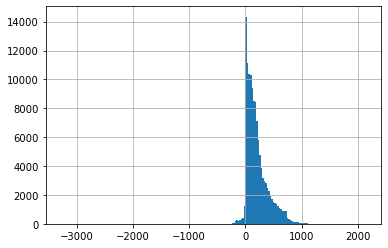

In [26]:
ax = bookings['Lead_Time'].hist(bins=200)

(0.0, 24.0)

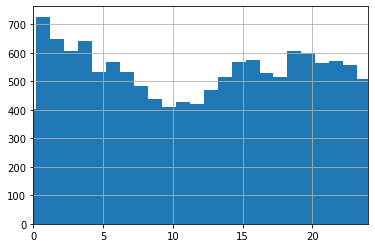

In [27]:
ax = bookings['Lead_Time'].hist(bins=5400)
ax.set_xlim(left=0, right=24)

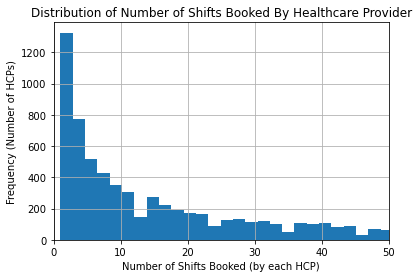

In [33]:
ax = bookings['Worker_ID'].value_counts().hist(bins=125)
ax.set_xlabel("Number of Shifts Booked (by each HCP)")
ax.set_ylabel("Frequency (Number of HCPs)")
ax.set_title("Distribution of Number of Shifts Booked By Healthcare Provider")
ax.set_xlim(left=0, right=50);